<a href="https://colab.research.google.com/github/KatherineMungayi/Compiler_construction_groupwork/blob/main/CompilerConstructionLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP MEMBERS(ICS 4C):**

121800

121195

119988

121199

#LAB 1 (9TH SEPTEMBER 2022)

**Instructions**
Give a brief description of the following tools:
Flex, Bison, Lex, Yacc

The description should have: 3-5 lines definition, diagram and code snippet

Submit a text file having the link to your Github repo having the colab/jupyter nb file.

**FLEX**

* Flex is a lexical analyzer generator that takes input specification
and generates a combined NFA to recognize all your patterns, converts it to an equivalent DFA, minimizes the automaton as much as possible, and generates C code that will implement it.

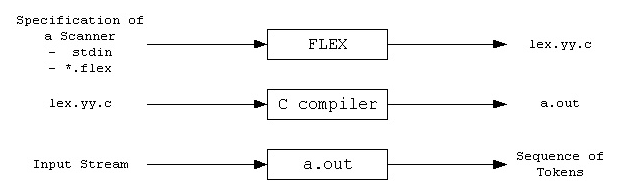


* FLEX reads a specification of a scanner either from an input file *.lex, or from standard input, and it generates as output a C source file lex.yy.c. Then, lex.yy.c is compiled and linked with the "-lfl" library to produce an executable a.out. Finally, a.out analyzes its input stream and transforms it into a sequence of tokens.


In [ ]:
#This code prints 'compiler construction'

In [ ]:

%{

#undef yywrap
#define yywrap() 1

%}

%%

[\n] {
	printf("Compiler construction\n");	
}

	
%%

main()
{
	yylex(); //calling the rules section
}

**BISON**

Bison is a general purpose parser generator that converts a grammar description for an LALR (Look Ahead Left Right) context free grammar into a C program that parsers that grammar. It is used in conjuction with Flex to create programs that are able to process input strings. Parsers generated with Bison take in a sequence of tokens from the lexical analyzer (generated with Flex), and recognizes it's structure in the form of a parse tree. The parse tree represents a mapping of grammar symbols to data elements.

### 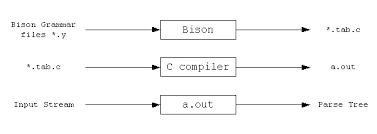

The code snippet below is defines a grammar for handling input in a calculator.

**Code Example**

In [ ]:
%{
#define YYSTYPE double
#include <math.h>
%}

/* BISON Declarations */
%token NUM
%left '-' '+'
%left '*' '/'
%left NEG     /* negation--unary minus */
%right '^'    /* exponentiation        */

/* Grammar follows */
%%
input:    /* empty string */
        | input line
;

line:     '\n'
        | exp '\n'  { printf ("\t%.10g\n", $1); }
;

exp:      NUM                { $$ = $1;         }
        | exp '+' exp        { $$ = $1 + $3;    }
        | exp '-' exp        { $$ = $1 - $3;    }
        | exp '*' exp        { $$ = $1 * $3;    }
        | exp '/' exp        { $$ = $1 / $3;    }
        | '-' exp  %prec NEG { $$ = -$2;        }
        | exp '^' exp        { $$ = pow ($1, $3); }
        | '(' exp ')'        { $$ = $2;         }
;
%%

**LEX**

Lex(Lexical Analyzer Generator) is a program used to generate scanners. These scanners are also known as tokenizers, and are used to recognize lexical patterns in text.
It takes as its input a LEX source program and produces lexical Analyzer as its output. Lexical Analyzer will convert the input string entered by the user into tokens as its output.


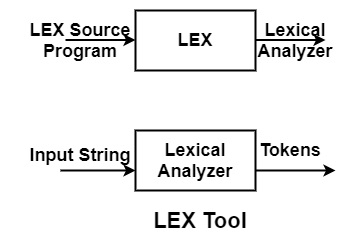

> Indented block

Lex can perform simple transformations by itself but its main purpose is to facilitate lexical analysis, the processing of character sequences such as source code to produce symbol sequences called tokens for use as input to other programs such as parsers. 
Lex can be used with a parser generator to perform lexical analysis. It is easy, for example, to interface Lex and Yacc, an open source program that generates code for the parser in the C programming language.

The structure of a lex program
A LEX program consists of three sections : Declarations, Rules and Auxiliary functions

DECLARATIONS

%%

RULES

%%

AUXILIARY FUNCTIONS

**Code Example**

In [ ]:
%option noyywrap
%{
	#include <stdlib.h>
	#include <stdio.h>
%}
	
number [0-9]+
 
%%
 
{number} {printf("Found : %d\n",atoi(yytext));}
 
%%
 
int main()
{
	yylex();
	return 1;
}

**YACC**

YACC (Yet another compiler compiler) is a tool that acts as a syntax analyzer or parser generator.It is designed to compile a LALR(1),(look ahead,left-to-right) grammar .This means it is used to produce the source code of the syntactic analyzer of the language produced by LALR (1) grammar. YACC was originally designed to be compelemnted by Lex.

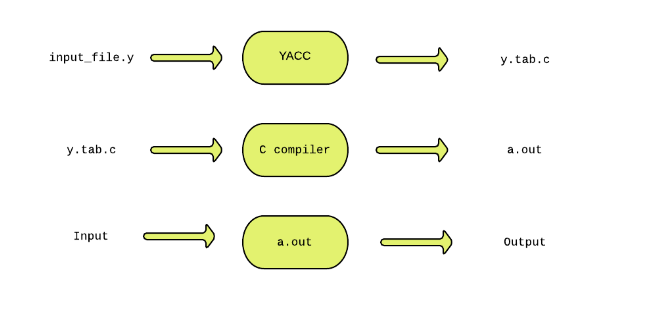


YACC TOOL


The diagram above demonstrates how the YACC tool works.
An input file with the desired grammar in YACC format is fed to the compiler to create a source program (y.tab.c)
The source program is compiled to produce an executable file which will then parse grammar given in the input_file.y

**Code example**


The input of yacc is divided into three sections

... definitions ...

%%

...rules... (This is where the grammar is placed)

%%

...subroutines...

In [ ]:
#Addition and subtraction arithmetic operation example with YACC

%{
  # include <stdio.h>

%}
%union {
    double real;
    int integer;
}
%token <real> REAL 
%token <integer> INTEGER
%token PLUS MINUS
%type <real> rexpr
%type <integer> ixexpr
%left PLUS MINUS 




#REFERENCES


Bison code retrieved from http://web.mit.edu/gnu/doc/html/bison_5.html

Wilhelm, R., Seidl, H., & Hack, S. (2013). Compiler Design. In Syntactic and Semantic Analysis.

https://silcnitc.github.io/lex.html

#LAB 2 (12TH SEPTEMBER 2022)

a. Using any TWO examples, show the conversion of NFA to DFA
[For assistance, I have attached two files on E-Learning to act as a guide. You are also 
free to use any other conversion methods that you prefer]
For submission, you can draw the necessary diagrams by hand or using a computer tool, 
then attach a screenshot to your lab activity running file.


b. Using the material on E-Learning, show how to use Flex and Bison when building a 
simple lexical analyzer

**NFA TO DFA CONVERSION**

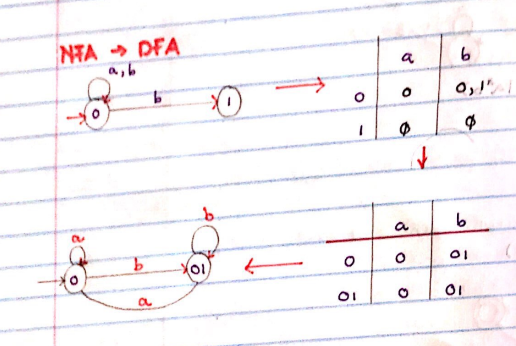

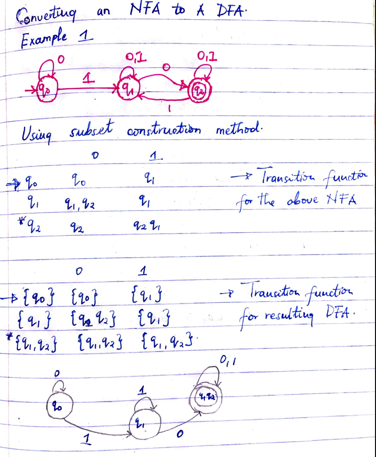

**FLEX AND BISON FOR BUILDING A SIMPLE LEXICAL ANALYSER**

Flex and bison usually go hand in hand when creating lexical analyzers.This is because in most cases a scanner is written using flex then a parser is written using Bison and both of them get combined to come up with a lexical analyzer.
There are three main steps involved in building a lexical analyser using flex;

**Step 1**: A file ,written in lex language is fed into a flex compiler.This file contains information about the lexical analyser which needs to be generated and has the extension '.l ' .The diagram below shows an example snippet of a file written in lex language to generate a lexical analyser which helps to identify capital and and small letters.

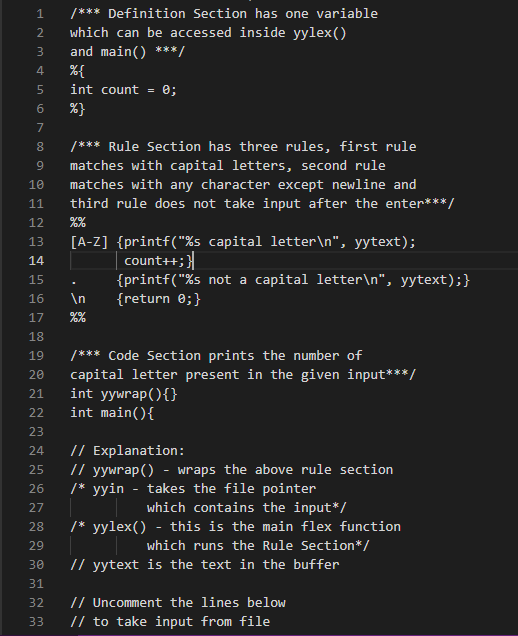


The parsing functions such as yyerror,yyparse() etc are written in Bison.The flex compiler transforms the flex file to a C program in a file always identified as lex.yy.c.As seen in the snippet above,the file has sections for rules,definitions and user defined sub routines.






**Step 2**: The C compiler compiles the lex.yy.c file into an executable file named a.out .The image below shows the command for this to take place.

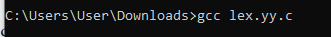

**Step 3** : The output file (executable file) accepts a stream of input characters and produces a stream of tokens.The image below shows this action;

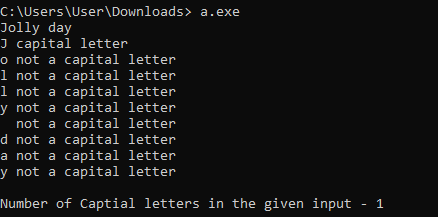

The a. out file gives output according to what was described in the original lex file.In this case,it shows the capital and non-capital letters after analyzing the input sentences and words.

A simple calculator using flex

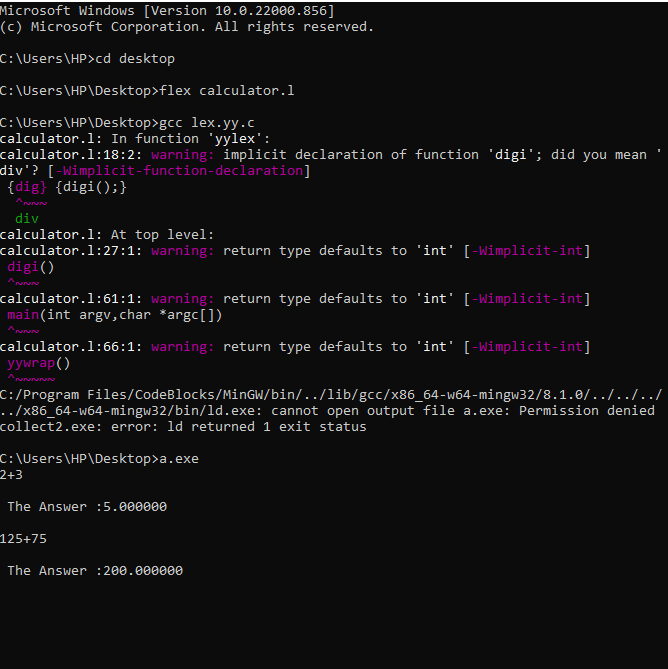

Steps to use Bison(With a different program):

 Write a lexical analyzer to process input and pass tokens to the parser.

 Write the grammar specification for bison, including grammar rules, yyparse() and yyerror().

 Run Bison on the grammar to produce the parser.

 Compile the code output by Bison, as well as any other source files.

 Link the object files to produce the finished product.


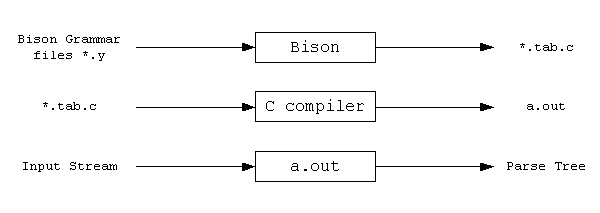

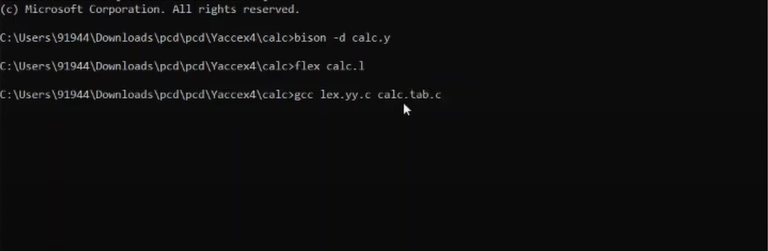

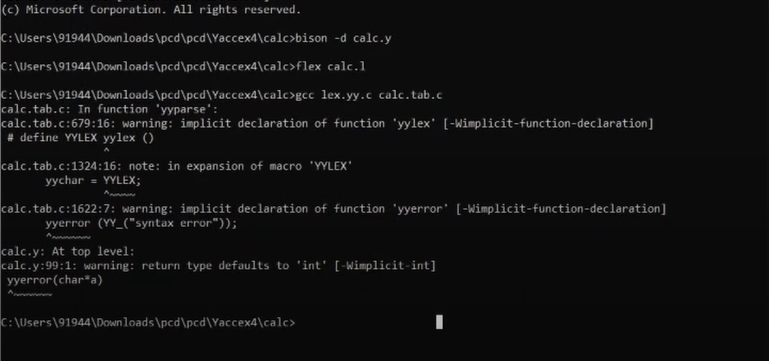